## Employment Stats

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.models.formatters import BasicTickFormatter
import openpyxl as xl
# import os
# import pathlib
from pathlib import Path

import panel as pn
import hvplot.pandas
import holoviews as hv

import bokeh
import jupyter_bokeh

In [3]:
cwd = Path.cwd()
cwd

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks')

In [4]:
def get_filepath(curr_dir, folder, filename):
    """Returns the PosixPath path from the PosixPath under pathlib package.
    
    Args:
        curr_dir (Path): The current working directory as a PosixPath variable.
        folder (str): The folder containing the filename
        filename (str): The filename

    Returns:
        PosixPath:  Absolute path

    >>> get_filepath(Path.cwd(), "project_data/2019-29", "aggregate-economy-tables.xlsx")
    PosixPath('/Users/keshavelango/Desktop/Fall 2024/Big Data Algorithms/Project/project_data/2019-29/aggregate-economy-tables.xlsx')
    """
    path = curr_dir / folder / filename
    return path.resolve()

In [5]:
path_2019_29 = "project_data/2019-29"
path_2023_33 = "project_data/2023-33"
folder_oesm19nat = 'project_data/oesm19nat'
folder_oesm23nat = 'project_data/oesm23nat'

In [6]:
agg_economy_name = "aggregate-economy-tables.xlsx"
education_filename = "education.xlsx"
skills_filename = "skills.xlsx"
national_M2019_dl_filename = "national_M2019_dl.xlsx"
national_M2023_dl_filename = "national_M2023_dl.xlsx"

In [7]:
cwd = Path.cwd()
cwd

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks')

In [8]:
agg_eco_2019_path_fn = get_filepath(cwd, path_2019_29, agg_economy_name)
agg_eco_2023_path_fn = get_filepath(cwd, path_2023_33, agg_economy_name)

education_filename_fn_2019 = get_filepath(cwd, path_2019_29, education_filename)
education_filename_fn_2023 = get_filepath(cwd, path_2023_33, education_filename)

skills_filename_fn = get_filepath(cwd, path_2023_33, skills_filename)

national_M2019_dl_path = get_filepath(cwd, folder_oesm19nat, national_M2019_dl_filename)
national_M2023_dl_path = get_filepath(cwd, folder_oesm23nat, national_M2023_dl_filename)

In [9]:
agg_eco_2019_sheet = pd.ExcelFile(agg_eco_2019_path_fn)
agg_eco_2023_sheet = pd.ExcelFile(agg_eco_2023_path_fn)

education_2019_sheet = pd.ExcelFile(education_filename_fn_2019)
education_2023_sheet = pd.ExcelFile(education_filename_fn_2023)

national_M2019_dl = pd.ExcelFile(national_M2019_dl_path)
national_M2023_dl = pd.ExcelFile(national_M2023_dl_path)

skills_sheet = pd.ExcelFile(skills_filename_fn)

In [10]:
agg_eco_2019_sheet_names = agg_eco_2019_sheet.sheet_names
agg_eco_2019_sheet_dfs = {}

agg_eco_2023_sheet_names = agg_eco_2023_sheet.sheet_names
agg_eco_2023_sheet_dfs = {}

for sheet_name in agg_eco_2019_sheet_names:
    agg_eco_2019_sheet_dfs[sheet_name] = pd.read_excel(agg_eco_2019_path_fn, sheet_name=sheet_name)

for sheet_name in agg_eco_2023_sheet_names:
    agg_eco_2023_sheet_dfs[sheet_name] = pd.read_excel(agg_eco_2023_path_fn, sheet_name=sheet_name)

In [11]:
education_2019_sheet_names = education_2019_sheet.sheet_names
education_2019_sheet_dfs = {}

education_2023_sheet_names = education_2023_sheet.sheet_names
education_2023_sheet_dfs = {}

for sheet_name in education_2019_sheet_names:
    education_2019_sheet_dfs[sheet_name] = pd.read_excel(education_filename_fn_2019, sheet_name=sheet_name)

for sheet_name in education_2023_sheet_names:
    education_2023_sheet_dfs[sheet_name] = pd.read_excel(education_filename_fn_2023, sheet_name=sheet_name)

In [ ]:
skills_sheet_names = skills_sheet.sheet_names

skills_sheet_dfs = {}

for sheet_name in skills_sheet_names:
    skills_sheet_dfs[sheet_name] = pd.read_excel(skills_filename_fn, sheet_name=sheet_name)

In [13]:
national_M2019_dl_sheet_names = national_M2019_dl.sheet_names
national_M2019_dl_sheet_dfs = {}

national_M2023_dl_sheet_names = national_M2023_dl.sheet_names
national_M2023_dl_sheet_dfs = {}

for sheet_name in national_M2019_dl_sheet_names:
    national_M2019_dl_sheet_dfs[sheet_name] = pd.read_excel(national_M2019_dl_path, sheet_name=sheet_name)

for sheet_name in national_M2023_dl_sheet_names:
    national_M2023_dl_sheet_dfs[sheet_name] = pd.read_excel(national_M2023_dl_path, sheet_name=sheet_name)

In [14]:
agg_eco_2019_sheet_dfs['Table 4.1'].columns = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[0,:].str.strip()
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].iloc[2:,:]
agg_eco_2019_sheet_dfs['Table 4.1'].columns = ['Labor Supply', '1999', '2009','2019','2029','Annual rate of change_1999-09', 'Annual rate of change_2009-19', 'Annual rate of change_2019-29']

drop_theshold_25 = int(len(agg_eco_2019_sheet_dfs['Table 4.2']) * 0.25)
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].dropna(thresh=drop_theshold_25)
agg_eco_2019_sheet_dfs['Table 4.1'] = agg_eco_2019_sheet_dfs['Table 4.1'].reset_index(drop=True)

agg_eco_2023_sheet_dfs['Table 4.1'].columns = agg_eco_2023_sheet_dfs['Table 4.1'].iloc[0,:].str.strip()
agg_eco_2023_sheet_dfs['Table 4.1'] = agg_eco_2023_sheet_dfs['Table 4.1'].iloc[1:,:]
agg_eco_2023_sheet_dfs['Table 4.1'].columns = ['Labor Supply', '2003', '2013','2023','2033','Compound annual rate of change, 2003-13', 'Compound annual rate of change, 2013-23', 'Compound annual rate of change, 2023-33']

agg_eco_2023_sheet_dfs['Table 4.1'] = agg_eco_2023_sheet_dfs['Table 4.1'].dropna(thresh=drop_theshold_25)
agg_eco_2023_sheet_dfs['Table 4.1'] = agg_eco_2023_sheet_dfs['Table 4.1'].reset_index(drop=True)

In [15]:
agg_eco_2019_sheet_dfs['Table 4.1']

,Labor Supply,1999,2009,2019,2029,Annual rate of change_1999-09,Annual rate of change_2009-19,Annual rate of change_2019-29
0,Total population,279.4,307.1,328.6,352.8,0.9,0.7,0.7
1,Civilian noninstitutional population aged 16 a...,207.8,235.8,259.2,280.0,1.3,0.9,0.8
2,Civilian labor force,139.4,154.2,163.5,171.3,1,0.6,0.5
3,Civilian labor force participation rate (percent),67.1,65.4,63.1,61.2,-0.3,-0.4,-0.3
4,Civilian household employment,133.5,139.9,157.5,163.7,0.5,1.2,0.4
5,Nonfarm payroll employment,129.2,131.3,150.9,157.4,0.2,1.4,0.4
6,Unemployment rate (percent),4.2,9.3,3.7,4.4,8.2,-8.9,1.9
7,"Private nonfarm business output per hour, chai...",47.5,61.8,69.3,82.5,2.7,1.1,1.8


In [16]:
agg_eco_2023_sheet_dfs['Table 4.1']

,Labor Supply,2003,2013,2023,2033,"Compound annual rate of change, 2003-13","Compound annual rate of change, 2013-23","Compound annual rate of change, 2023-33"
0,Total population,290.5,316.8,338.1,348.7,0.9,0.7,0.3
1,Civilian noninstitutional population age 1...,221.2,245.7,266.9,283.3,1.1,0.8,0.6
2,Civilian labor force,146.5,155.4,167.1,173.3,0.6,0.7,0.4
3,Civilian labor force participation rate ...,66.2,63.3,62.6,61.2,-0.5,-0.1,-0.2
4,Civilian household employment,137.7,143.9,161.0,166.0,0.4,1.1,0.3
5,Nonagricultural payroll employment,130.3,136.4,156.1,162.7,0.5,1.4,0.4
6,Unemployment rate (percent)[1],6.0,7.4,3.6,4.2,2.1,-6.8,1.5
7,"Private nonfarm business output per hour, ch...",56.2,66.9,76.8,90.7,1.8,1.4,1.7


## Wage data

### Occupational Employment and Wage Statistics (OEWS) Survey

- Here since there are `1138` different Occupcation Titles, we use the top `A_MEDIAN rows in both 2019 and 2023` occupational Employment survey data

In [17]:
national_M2019_dl_sheet_dfs['national_M2019_dl'].columns = national_M2019_dl_sheet_dfs['national_M2019_dl'].columns.str.upper()
national_M2019_dl_sheet_dfs['national_M2019_dl'].drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL'], axis=1, inplace=True)

columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].astype(str)

national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = \
    national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].map(
        lambda x: x.replace('*', '0').replace('#', '0')
    )
national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace] = national_M2019_dl_sheet_dfs['national_M2019_dl'][columns_to_replace].astype(np.float64)

In [18]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL','PCT_RPT'], axis=1, inplace=True)
national_M2023_dl_sheet_dfs['national_M2023_dl']

columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(str)

national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = \
    national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].map(
        lambda x: x.replace('*', '0').replace('#', '0')
    )
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(np.float64)

In [19]:
print(len(np.unique(national_M2019_dl_sheet_dfs['national_M2019_dl'].loc[:, ['OCC_TITLE']])))
print(len(np.unique(national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:, ['OCC_TITLE']])))

1064
1138


In [20]:
top_median_annual_wage_2023 = national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[1:, ['OCC_TITLE', 'TOT_EMP','EMP_PRSE','H_MEDIAN','A_MEDIAN']]\
    .sort_values(by='A_MEDIAN', ascending=False)\
    .drop_duplicates(subset=['OCC_TITLE', 'A_MEDIAN'], keep='first')

top_median_annual_wage_2019 = national_M2019_dl_sheet_dfs['national_M2019_dl'].loc[1:, ['OCC_TITLE', 'TOT_EMP','EMP_PRSE','H_MEDIAN','A_MEDIAN']]\
    .sort_values(by='A_MEDIAN', ascending=False)\
    .drop_duplicates(subset=['OCC_TITLE', 'A_MEDIAN'], keep='first')


## Education

In [21]:
education_2019_sheet_dfs['Table 5.2'].columns = education_2019_sheet_dfs['Table 5.2'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].iloc[1:]

drop_theshold_25 = int(len(education_2019_sheet_dfs['Table 5.2']) * 0.25)
education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].dropna(thresh=drop_theshold_25)
education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].reset_index(drop=True)


education_2023_sheet_dfs['Table 5.2'].columns = education_2023_sheet_dfs['Table 5.2'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].iloc[1:]

drop_theshold_25 = int(len(education_2023_sheet_dfs['Table 5.2']) * 0.25)
education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].dropna(thresh=drop_theshold_25)
education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].reset_index(drop=True)

In [22]:
education_2019_sheet_dfs['Table 5.2']

,Typical entry-level education,"Employment, 2019","Employment distribution, percent, 2019","Employment change, percent, 2019-29","Median annual wage, 2020(1)"
0,"Total, all occupations",162795.6,100,3.7,41950
1,Doctoral or professional degree,4412.8,2.7,5.9,110200
2,Master's degree,2633.9,1.6,15,78210
3,Bachelor's degree,36864.2,22.6,6.4,77920
4,Associate's degree,3601.6,2.2,6.2,56590
5,Postsecondary nondegree award,10093.2,6.2,5.6,41520
6,"Some college, no degree",4085,2.5,-0.1,37770
7,High school diploma or equivalent,62410,38.3,1.5,39070
8,No formal educational credential,38694.8,23.8,3.3,27510


In [23]:
education_2023_sheet_dfs['Table 5.2']

,Typical entry-level education,"Employment, 2023","Employment, 2033","Employment distribution, percent, 2023","Employment distribution, percent, 2033","Numeric employment change, 2023-33","Percent employment change, 2023-33","Median annual wage, dollars, 2023[1]"
0,"Total, all occupations",167849.8,174589,100,100,6739.2,4,48060
1,Doctoral or professional degree,4486.5,4804.6,2.7,2.8,318.1,7.1,124550
2,Master's degree,3668.6,4111,2.2,2.4,442.4,12.1,79840
3,Bachelor's degree,41431.7,44410,24.7,25.4,2978.3,7.2,86460
4,Associate's degree,3438.3,3653.7,2,2.1,215.4,6.3,62180
5,Postsecondary nondegree award,10383.2,11003.2,6.2,6.3,620,6,47740
6,"Some college, no degree",4241.4,4170.5,2.5,2.4,-70.9,-1.7,44130
7,High school diploma or equivalent,63066.5,64648.7,37.6,37,1582.1,2.5,45040
8,No formal educational credential,37133.6,37787.4,22.1,21.6,653.8,1.8,34430


In [24]:
education_2019_sheet_dfs['Table 5.3'].columns = education_2019_sheet_dfs['Table 5.3'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].iloc[1:]

drop_theshold_01 = int(len(education_2019_sheet_dfs['Table 5.3']) * 0.01)
education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].dropna(thresh=drop_theshold_01)
education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].reset_index(drop=True)


education_2023_sheet_dfs['Table 5.3'].columns = education_2023_sheet_dfs['Table 5.3'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].iloc[1:]

drop_theshold_01 = int(len(education_2019_sheet_dfs['Table 5.3']) * 0.01)
education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].dropna(thresh=drop_theshold_01)
education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].reset_index(drop=True)


In [25]:
education_2019_sheet_dfs['Table 5.3']

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
0,"Total, all occupations",00-0000,7.9,23.6,20,9.5,23.9,10.6,4.4
1,Chief executives(1),11-1011,1.6,8,13.9,4.8,41,24.1,6.5
2,General and operations managers,11-1021,2.6,16.9,24.3,10,33.4,11.1,1.7
3,Legislators(1),11-1031,1.6,8,13.9,4.8,41,24.1,6.5
4,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2
...,...,...,...,...,...,...,...,...,...
786,"Pump operators, except wellhead pumpers(1)",53-7072,15.8,40.1,20.2,8.5,12.9,2.5,0.1
787,Wellhead pumpers(1),53-7073,15.8,40.1,20.2,8.5,12.9,2.5,0.1
788,Refuse and recyclable material collectors,53-7081,26.4,44.7,15,6.1,7.3,0.3,0.1
789,"Tank car, truck, and ship loaders(1)",53-7121,17.4,49.6,19.6,6.2,5.8,1.4,0.1


In [26]:
education_2023_sheet_dfs['Table 5.3']

,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
0,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8
1,Chief executives[1],11-1011,1.6,7.9,13.7,5.2,40,24.7,6.9
2,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6
3,Legislators[1],11-1031,1.6,7.9,13.7,5.2,40,24.7,6.9
4,Advertising and promotions managers,11-2011,1,4.2,7.8,5.2,65.2,15.2,1.4
...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers[1]",53-7072,14,45.1,25.5,6.8,7.8,0.7,0.2
829,Wellhead pumpers[1],53-7073,14,45.1,25.5,6.8,7.8,0.7,0.2
830,Refuse and recyclable material collectors,53-7081,25.2,48.8,16.1,3.7,5.2,0.7,0.4
831,"Tank car, truck, and ship loaders[1]",53-7121,14.4,51.5,19.8,6.4,6.6,1,0.4


In [27]:
education_2019_sheet_dfs['Table 5.4'].columns = education_2019_sheet_dfs['Table 5.4'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].iloc[1:]
education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].iloc[:-1,:]
education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].reset_index(drop=True)

cols_to_replace=['Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']

education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].astype(str)
education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].map(
    lambda x: x.replace('nan','Not Available')
)
education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].astype(object)
education_2019_sheet_dfs['Table 5.4']


,2019 National Employment Matrix title,2019 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,Not Available
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,Not Available
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,Not Available
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,Not Available
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,Not Available
...,...,...,...,...,...
785,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,Not Available,Moderate-term on-the-job training
786,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
787,Refuse and recyclable material collectors,53-7081,No formal educational credential,Not Available,Short-term on-the-job training
788,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,Not Available,Short-term on-the-job training


In [28]:
education_2023_sheet_dfs['Table 5.4'].columns = education_2023_sheet_dfs['Table 5.4'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].iloc[1:]
education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].iloc[:-1,:]
education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].reset_index(drop=True)

cols_to_replace=['Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']

education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].astype(str)
education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].map(
    lambda x: x.replace('nan','Not Available')
)

education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].astype(object)
education_2023_sheet_dfs['Table 5.4']

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,11-1011,Bachelor's degree,5 years or more,Not Available,OOH Content
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,Not Available,OOH Content
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,Not Available,—
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,Not Available,OOH Content
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,Not Available,OOH Content
...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,Not Available,Moderate-term on-the-job training,—
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,Not Available,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,Not Available,Short-term on-the-job training,—


## Skills

In [29]:
for key in list(skills_sheet_dfs.keys())[1:]:
    if key != 'Table 6.2':
        skills_sheet_dfs[key].columns = skills_sheet_dfs[key].iloc[0,:].str.strip()
        # skills_sheet_dfs[key].columns
        skills_sheet_dfs[key] = skills_sheet_dfs[key].iloc[1:]
        drop_theshold = int(len(skills_sheet_dfs[key]) * 0.25)
        skills_sheet_dfs[key] = skills_sheet_dfs[key].dropna(thresh=drop_theshold)
        skills_sheet_dfs[key] = skills_sheet_dfs[key].reset_index(drop=True)

skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[:-6]

skills_sheet_dfs['Table 6.2'].columns = skills_sheet_dfs['Table 6.2'].iloc[0,:].str.strip()
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[1:]
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].reset_index(drop=True)
skills_sheet_dfs['Table 6.2']



,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
0,"Total, all occupations",00-0000,167849.8,174589,6739.2,4,48060,—,3.8,3,...,3.5,3.2,2.6,1.9,2.2,3.5,2.7,1.7,3.2,3.3
1,Chief executives,11-1011,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,11-1021,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],11-1031,33.7,35,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,11-2011,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4,3.6,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,11.7,12.3,0.6,5,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,53-7073,19.4,19,-0.4,-2,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,53-7081,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",53-7121,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [30]:
skills_sheet_dfs['Table 6.2'] = skills_sheet_dfs['Table 6.2'].iloc[1:,:]

In [31]:
skills_sheet_dfs['Table 6.2'].loc[:,'Typical education needed for entry'].value_counts()

Typical education needed for entry
High school diploma or equivalent    327
Bachelor's degree                    178
No formal educational credential     108
Doctoral or professional degree       73
Postsecondary nondegree award         51
Associate's degree                    48
Master's degree                       40
Some college, no degree                7
Name: count, dtype: int64

In [32]:
data_for_sklearn  = skills_sheet_dfs['Table 6.2'].drop(['2023 National Employment Matrix code','Employment change, numeric, 2023–33','Employment change, percent, 2023–33'], axis=1)
data_for_sklearn

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,313.9,331.1,206680,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,3630.1,3840.5,101280,Bachelor's degree,4.1,3.5,3.1,3.6,3.6,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],33.7,35,47290,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,22.2,21.7,131870,Bachelor's degree,4,3.6,3.5,3.5,3.5,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,389.1,420.8,157620,Bachelor's degree,4,3.6,3.4,3.7,3.5,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",11.7,12.3,54690,High school diploma or equivalent,3.2,2.8,2.3,2.9,2.2,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,19.4,19,71830,High school diploma or equivalent,3.5,3.1,2.5,2.9,2.5,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,148.4,151.9,45760,No formal educational credential,2.7,1.6,1.6,2.1,2.3,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",12.7,13.2,58620,No formal educational credential,3.6,3,2.5,2.8,2.6,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


In [33]:
data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'].astype(str)

data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'].map(
    lambda x: x.replace('—', '0').replace('>=239,200', '239200')
)
data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'] = data_for_sklearn.loc[:,'Median annual wage, dollars, 2023[1]'].astype(object)
data_for_sklearn

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
1,Chief executives,313.9,331.1,206680,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
2,General and operations managers,3630.1,3840.5,101280,Bachelor's degree,4.1,3.5,3.1,3.6,3.6,...,3.7,4,3,1.7,1.7,4.1,3.6,1.7,3.5,3.8
3,Legislators[2],33.7,35,47290,Bachelor's degree,4.2,3.7,3.5,4.1,3.9,...,4,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4,4.2
4,Advertising and promotions managers,22.2,21.7,131870,Bachelor's degree,4,3.6,3.5,3.5,3.5,...,3.5,3.2,3,1.3,1.3,3.8,3.1,1.4,3.9,3.7
5,Marketing managers,389.1,420.8,157620,Bachelor's degree,4,3.6,3.4,3.7,3.5,...,3.5,3.8,3.1,1.1,1.3,4,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",11.7,12.3,54690,High school diploma or equivalent,3.2,2.8,2.3,2.9,2.2,...,2.6,2.8,2.8,3.1,2.9,3.5,3,2,2.8,3.2
829,Wellhead pumpers,19.4,19,71830,High school diploma or equivalent,3.5,3.1,2.5,2.9,2.5,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2,2.6,2.8
830,Refuse and recyclable material collectors,148.4,151.9,45760,No formal educational credential,2.7,1.6,1.6,2.1,2.3,...,2.5,2.1,1.3,2.6,3,2.7,1.5,1.2,2.5,2.3
831,"Tank car, truck, and ship loaders",12.7,13.2,58620,No formal educational credential,3.6,3,2.5,2.8,2.6,...,3,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


## VISUALIZATIONS

## Top 10 Annual Wage across occupation title

In [34]:
hvplot.extension("bokeh")

table_2019 = hv.Table(top_median_annual_wage_2019.head(10)
                  ).opts(width=1000, 
                         height=400, 
                         show_grid=True,
                         bgcolor='white',
                         visible=True, title = "Wage Stats - 2019", )


bar_2019 = top_median_annual_wage_2019.head(10).hvplot.bar(x='OCC_TITLE', 
    y='A_MEDIAN',
    width=1000, 
    height=900  
).opts(
    xrotation=90,
    padding=0.4,
    margin=1,
    fontsize='14pt',
    show_legend=True,
    title="Top 10 Annual Wage (USD) across Occupation Title - 2019",
    tools=['hover'],
    show_frame=True,
    hover_color='black',
    xlabel = "",
    ylabel = "",
    yformatter=BasicTickFormatter(use_scientific=False)
)

table_2023 = hv.Table(top_median_annual_wage_2023.head(10)
                  ).opts(width=1000, 
                         height=400, 
                         show_grid=True,
                         bgcolor='white',
                         visible=True,title = "Wage Stats - 2023")

bar_2023 = top_median_annual_wage_2023.head(10).hvplot.bar(
    x='OCC_TITLE', 
    y='A_MEDIAN',
    width=1000, 
    height=900  
).opts(
    xrotation=90,
    padding=0.4,
    margin=1,
    fontsize='14pt',
    show_legend=True,
    title="Top 10 Annual Wage (USD) across Occupation Title - 2023",
    tools=['hover'],
    show_frame=True,
    hover_color='black',
    xlabel = "",
    ylabel = "",
    yformatter=BasicTickFormatter(use_scientific=False)
)

dashboard = pn.Column(
    pn.Row(table_2019, table_2023), 
    pn.Row(bar_2019, bar_2023)
)

dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'1ebe4c72-b4dd-42ec-a6ab-a5b18ea561a1': {'version…

- There is an increase in the Median Annual Wage across `all Physicians` when comparing 2019 with 2023.
- The `EMP_PRSE` represents the `Percent relative standard error (PRSE) for the employment estimate`. Lower values indicate more precise values.
- Since `Prosthodontists` has `33.4` as the `EMP_PRSE`, the actual value for annual median wage would be different.

- There is a major spike in `Airline Pilots, CoPilots and Flight Engineers` of `50k+` in 2023, which may be due to resuming of air travel after `COVID-19`.
- The next increase is in `General Internal Medicine Physicians` of `20k+` in 2023.


### Employment Distribution across Educational Level 

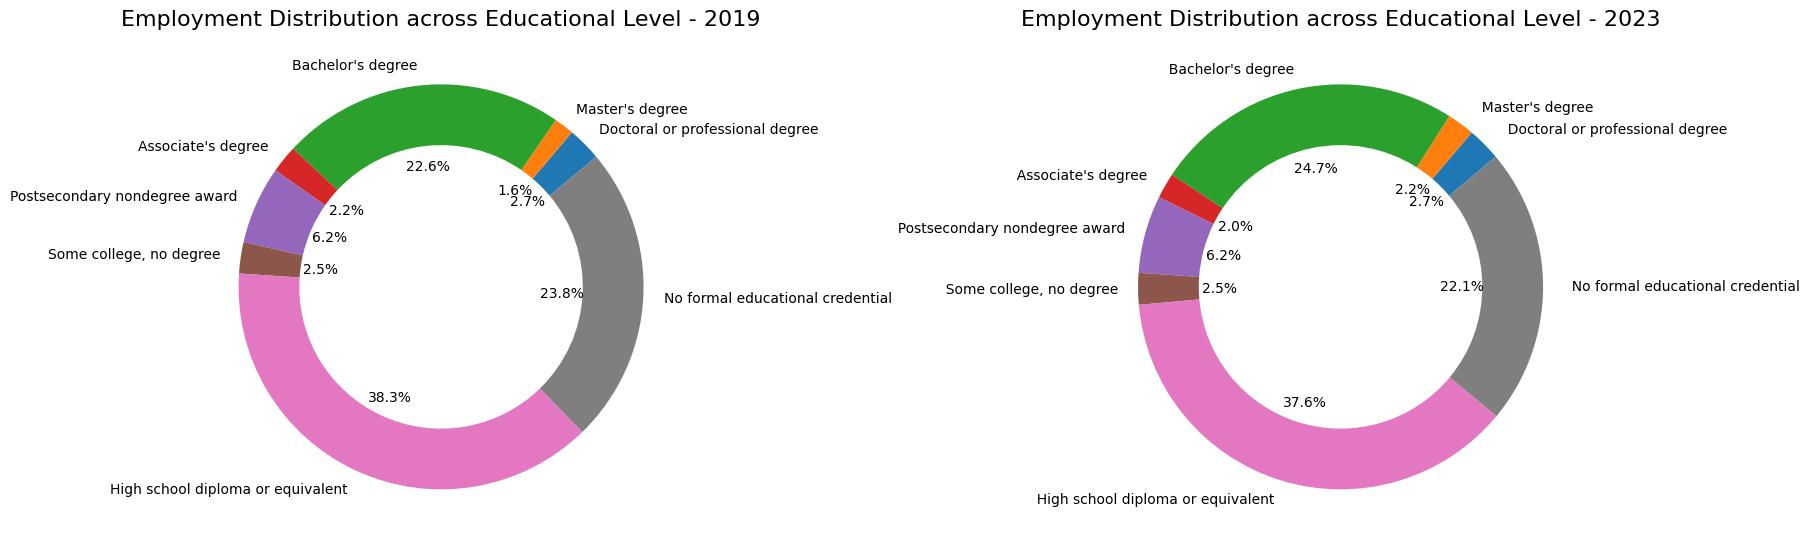

In [35]:
piechart_labels_2019 = list(education_2019_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2019 = list(education_2019_sheet_dfs['Table 5.2'].iloc[1:, 2])

piechart_labels_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,18))

ax1.pie(piechart_values_2019,labels = piechart_labels_2019,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title("Employment Distribution across Educational Level - 2019", fontsize = 16)

ax2.pie(piechart_values_2023,labels = piechart_labels_2023,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title("Employment Distribution across Educational Level - 2023", fontsize=16)

plt.tight_layout()
plt.show()


- There seems to be a `2.1%` increase in the `Bachelor's degree` with a `0.7% decrease` in `High school diploma`.

- `Associate's degree` seems to be dropped by `0.2%` with a `Master's  degree` has jumpred by `0.6%`.

- There is a `1.6%` decrease in employment for `non formal educational credential`.

- This could be due to the effect of `COVID-19` wherein various businesses took a major hit and the shift could be due to `increase in priority for a more stable employment`.

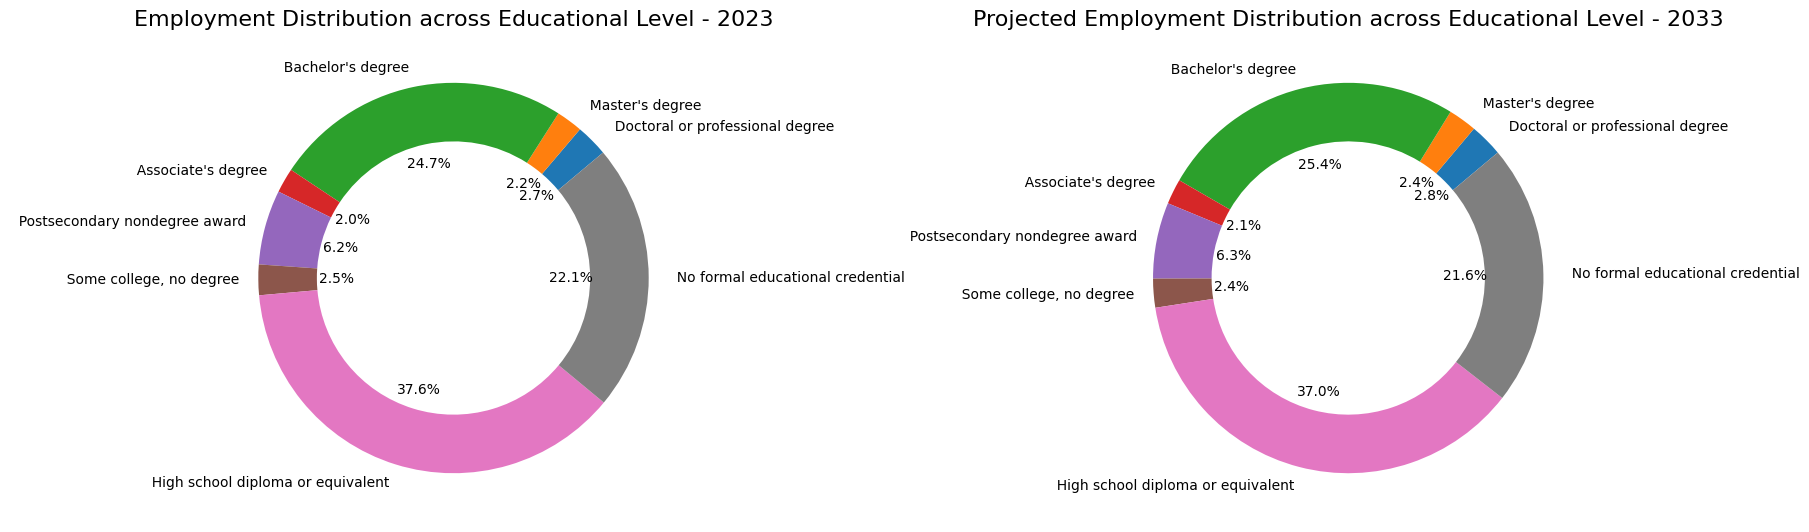

In [36]:
piechart_labels_2033 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2033 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 2])

piechart_labels_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 1])

fig, (ax2, ax1) = plt.subplots(1,2,figsize=(18,18))

ax1.pie(piechart_values_2033,labels = piechart_labels_2033,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title("Projected Employment Distribution across Educational Level - 2033",fontsize = 16)

ax2.pie(piechart_values_2023,labels = piechart_labels_2023,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title("Employment Distribution across Educational Level - 2023",fontsize = 16)

plt.tight_layout()
plt.show()

- Comparing `2023` and the projected stats of `2033`, there is a `0.7%` increase under `bachelor's degree`, `0.2% increase` under `master's degree`, `0.1% increase` under `Doctoral or professional degree`. 

- There is also a `0.1%` increase under `Associate's degree` .

- However there is a `0.6%` decrease in the highschool diploma, `0.1%` decrease for non degree college education, `0.6%` decrease under `no formal educational credential`

### Distribution of Education Needed for Job Entry

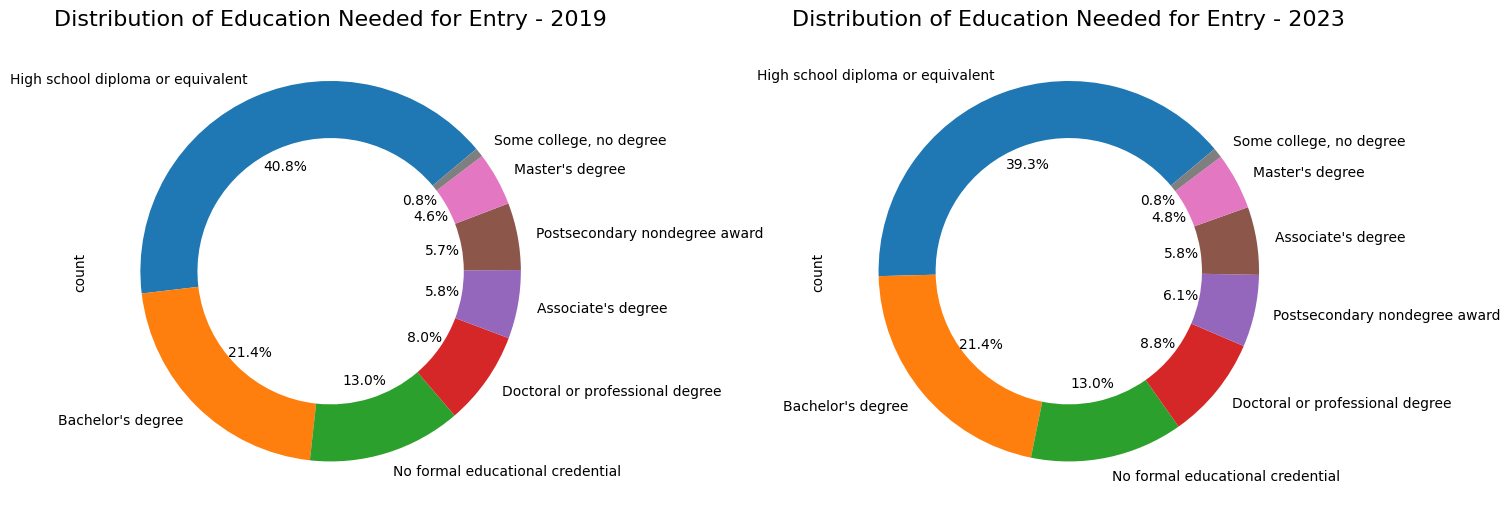

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

education_counts_2019 = education_2019_sheet_dfs['Table 5.4']['Typical education needed for entry'].value_counts()
education_counts_2019.plot(kind='pie', autopct='%1.1f%%', ax=ax1, startangle=40, wedgeprops={'width': 0.3})
ax1.set_title('Distribution of Education Needed for Entry - 2019', fontsize=16)

education_counts_2023 = education_2023_sheet_dfs['Table 5.4']['Typical education needed for entry'].value_counts()
education_counts_2023.plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle=40, wedgeprops={'width': 0.3})
ax2.set_title('Distribution of Education Needed for Entry - 2023', fontsize=16)

plt.tight_layout()
plt.show()


- There is a `0.8% increase` in the Doctoral or professional degree, `0.4% increase ` in Postsecondary non degree award , `0.2% increase ` in Master's degree.
- The other categories remain unchanged.

### Distribution of On-the-Job Training requirements

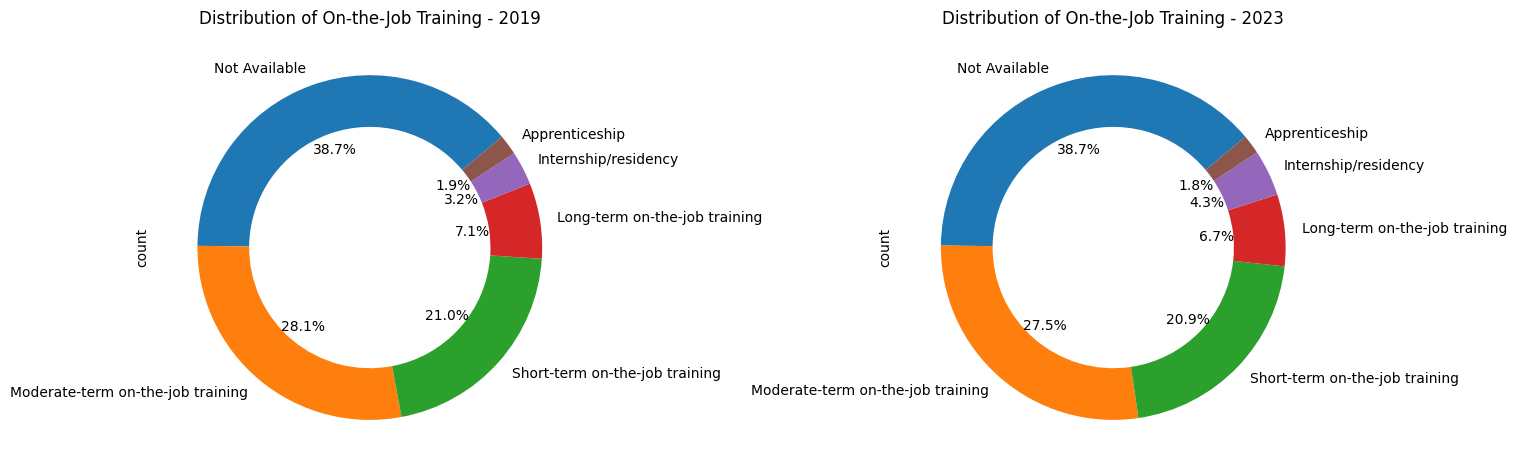

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

job_training_counts_2023 = education_2023_sheet_dfs['Table 5.4']['Typical on-the-job training needed to attain competency in the occupation'].value_counts()
job_training_counts_2023.plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title('Distribution of On-the-Job Training - 2023')

job_training_counts_2019 = education_2019_sheet_dfs['Table 5.4']['Typical on-the-job training needed to attain competency in the occupation'].value_counts()
job_training_counts_2019.plot(kind='pie', autopct='%1.1f%%', ax=ax1, startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title('Distribution of On-the-Job Training - 2019')

plt.tight_layout()
plt.show()

- There is a `1.1% increase` in Internship/residency for on-job training.
- There is a `0.6% drop` in Mopderate-term , `0.4%` in long-term, `0.1%` in short-term, `0.1%` in apprenticeship for on-job training. 

### Education Qualification by Percentage

In [39]:
education_2019_sheet_dfs['Table 5.3'].set_index('2019 National Employment Matrix title', inplace=True)
education_2023_sheet_dfs['Table 5.3'].set_index('2023 National Employment Matrix title', inplace=True)


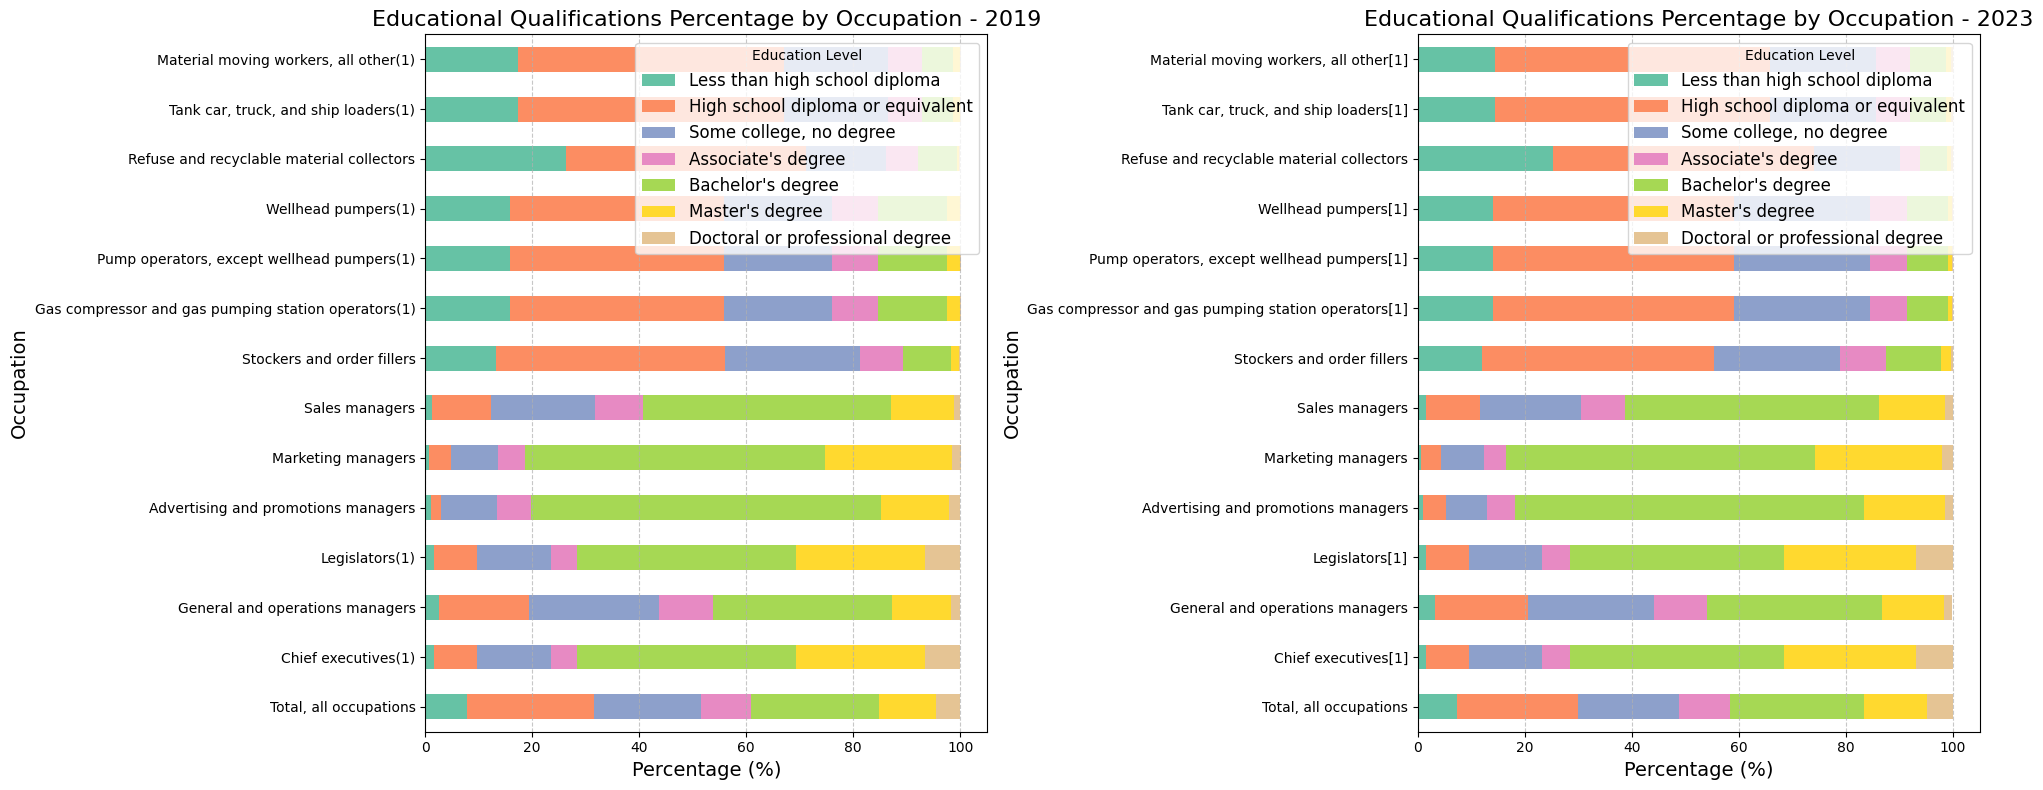

In [40]:
sns.set_palette("Set2")

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 8))

pd.concat((education_2019_sheet_dfs['Table 5.3'].head(7), education_2019_sheet_dfs['Table 5.3'].tail(7))).plot(kind='barh', stacked=True, ax = ax1)
pd.concat((education_2023_sheet_dfs['Table 5.3'].head(7), education_2023_sheet_dfs['Table 5.3'].tail(7))).plot(kind='barh', stacked=True, ax = ax2)

ax1.set_title('Educational Qualifications Percentage by Occupation - 2019',fontsize=16)
ax1.set_xlabel('Percentage (%)', fontsize=14)
ax1.set_ylabel('Occupation', fontsize=14)
ax1.legend(title='Education Level', loc='upper right', fontsize=12)
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)


ax2.set_title('Educational Qualifications Percentage by Occupation - 2023',fontsize=16)
ax2.set_xlabel('Percentage (%)', fontsize=14)
ax2.set_ylabel('Occupation', fontsize=14)
ax2.legend(title='Education Level', loc='upper right', fontsize=12)
ax2.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- The top of the graph depcits occupation titles wherein for more than `35%` of employed people have a `High school diploma` in `2019` and `40%` in `2023`.

- Looking at the overall occupations, `other than self-employed`, more than `20%` of people currently employed have a `Bachelor's degree`.

- The bottom of the graph depicts occupation titles like `managers, chief executives`, with more specialized jobs wherein `nearly 50%` having a `Bachelor's degree`.

## Education, Adaptability and Skills comparison

In [78]:
pn.extension()

columns_to_display = ['2023 National Employment Matrix title','Typical education needed for entry',\
                                                         'Median annual wage, dollars, 2023[1]','Adaptability','Leadership'\
                                                            ,'Creativity and innovation','Critical and analytical thinking','Customer service','Detail oriented',]

def plot_my_data(education, min_Adaptability, min_Leadership):
    mask = (data_for_sklearn['Typical education needed for entry'] == education) & \
           (data_for_sklearn.Adaptability <= min_Adaptability) & \
           (data_for_sklearn.Leadership <= min_Leadership)
    
    filtered_data = data_for_sklearn[mask][columns_to_display].sort_values(
        ['Median annual wage, dollars, 2023[1]', 'Adaptability', 'Leadership'],
        ascending=False
    )

    return pn.Column(pn.widgets.Tabulator(filtered_data, pagination='remote', page_size=10))

education_selector = pn.widgets.Select(
    name='Typical education needed for entry',
    options=skills_sheet_dfs['Table 6.2']['Typical education needed for entry'].unique().tolist(),
    value = 'Bachelor\'s degree'
)

Adaptability_slider = pn.widgets.FloatSlider(
    name='Adaptability',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

Leadership_slider = pn.widgets.FloatSlider(
    name='Leadership',
    start=1.0,
    end=5.0,
    step=0.1,
    value=4.0
)

interaction = pn.interact(plot_my_data, education=education_selector, min_Adaptability=Adaptability_slider, min_Leadership=Leadership_slider)
pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by Adaptability and Leadership"), align='center'),
    interaction
)



BokehModel(combine_events=True, render_bundle={'docs_json': {'d2a3722c-7fd4-4a10-9530-706e2a528520': {'version…

## Dynamic Viz

In [48]:
skills_sheet_dfs.keys()

dict_keys(['Index', 'Table 6.1', 'Table 6.2', 'Table 6.3', 'Table 6.4', 'Table 6.5'])

In [59]:
result = ['11-0000','15-0000','13-0000','53-7190', '29-0000']

In [53]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].isnull().sum()

PRIM_STATE       0
OWN_CODE         0
OCC_CODE         0
OCC_TITLE        0
O_GROUP          0
TOT_EMP          0
EMP_PRSE         0
H_MEAN           0
A_MEAN           0
MEAN_PRSE        0
H_PCT10          0
H_PCT25          0
H_MEDIAN         0
H_PCT75          0
H_PCT90          0
A_PCT10          0
A_PCT25          0
A_MEDIAN         0
A_PCT75          0
A_PCT90          0
ANNUAL        1320
HOURLY        1396
dtype: int64

In [63]:
wage_df = national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:,['OCC_CODE','OCC_TITLE','TOT_EMP','EMP_PRSE','A_MEAN','MEAN_PRSE']]
wage_df['OCC_CODE'] = wage_df['OCC_CODE'].astype('str')
wage_df

,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,A_MEAN,MEAN_PRSE
0,00-0000,All Occupations,151853870,0.0,65470.0,0.3
1,11-0000,Management Occupations,10495770,0.4,137750.0,0.5
2,11-1000,Top Executives,3751510,0.4,136100.0,0.9
3,11-1010,Chief Executives,211230,1.4,258900.0,0.7
4,11-1011,Chief Executives,211230,1.4,258900.0,0.7
...,...,...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,135430,1.3,47810.0,0.7
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1400,53-7121,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1401,53-7190,Miscellaneous Material Moving Workers,23970,3.4,45840.0,1.0


In [68]:
wage_df['OCC_CODE'].head(10)

0    00-0000
1    11-0000
2    11-1000
3    11-1010
4    11-1011
5    11-1020
6    11-1021
7    11-1030
8    11-1031
9    11-2000
Name: OCC_CODE, dtype: object

In [64]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   1403 non-null   object 
 1   OCC_TITLE  1403 non-null   object 
 2   TOT_EMP    1403 non-null   int64  
 3   EMP_PRSE   1403 non-null   float64
 4   A_MEAN     1403 non-null   float64
 5   MEAN_PRSE  1403 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 65.9+ KB


In [65]:
for value in result:
    print(value, value.split('-')[0])


11-0000 11
15-0000 15
13-0000 13
53-7190 53
29-0000 29


In [70]:
tuple([value.split('-')[0]+'-' for value in result])

('11-', '15-', '13-', '53-', '29-')

In [72]:
wage_data_display = wage_df[wage_df.OCC_CODE.str.startswith(tuple([value.split('-')[0]+'-' for value in result]))]
wage_data_display

,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,A_MEAN,MEAN_PRSE
1,11-0000,Management Occupations,10495770,0.4,137750.0,0.5
2,11-1000,Top Executives,3751510,0.4,136100.0,0.9
3,11-1010,Chief Executives,211230,1.4,258900.0,0.7
4,11-1011,Chief Executives,211230,1.4,258900.0,0.7
5,11-1020,General and Operations Managers,3507810,0.4,129330.0,0.9
...,...,...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,135430,1.3,47810.0,0.7
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1400,53-7121,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1401,53-7190,Miscellaneous Material Moving Workers,23970,3.4,45840.0,1.0


In [73]:
wage_data_display.sort_values(['A_MEAN'], ascending=False)

,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,A_MEAN,MEAN_PRSE
566,29-1243,Pediatric Surgeons,1180,30.6,449320.0,7.9
551,29-1212,Cardiologists,15190,7.3,423250.0,2.5
565,29-1242,"Orthopedic Surgeons, Except Pediatric",14820,6.1,378250.0,5.6
561,29-1224,Radiologists,31960,5.2,353960.0,4.1
563,29-1240,Surgeons,53900,3.2,348890.0,1.7
...,...,...,...,...,...,...
1366,53-6031,Automotive and Watercraft Service Attendants,92530,1.8,34530.0,0.4
1328,53-3011,"Ambulance Drivers and Attendants, Except Emerg...",11520,3.2,34420.0,0.9
1327,53-3010,"Ambulance Drivers and Attendants, Except Emerg...",11520,3.2,34420.0,0.9
1363,53-6020,Parking Attendants,118130,4.0,32700.0,0.6


In [76]:
hvplot.extension("bokeh")

dynamic_wage_table = hv.Table(wage_data_display.sort_values(['A_MEAN'], ascending=False)
                  ).opts(width=1000, 
                         height=400, 
                         show_grid=True,
                         bgcolor='white',
                         visible=True, title = "Wage Stats - 2019", )


dashboard = pn.Column(
    pn.Row(dynamic_wage_table)
)

dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'ec30251a-425e-4a63-9cba-08f680c49987': {'version…

In [81]:
wage_df.drop_duplicates(['OCC_TITLE'])

,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,A_MEAN,MEAN_PRSE
0,00-0000,All Occupations,151853870,0.0,65470.0,0.3
1,11-0000,Management Occupations,10495770,0.4,137750.0,0.5
2,11-1000,Top Executives,3751510,0.4,136100.0,0.9
3,11-1010,Chief Executives,211230,1.4,258900.0,0.7
5,11-1020,General and Operations Managers,3507810,0.4,129330.0,0.9
...,...,...,...,...,...,...
1396,53-7073,Wellhead Pumpers,18230,6.2,69930.0,1.6
1397,53-7080,Refuse and Recyclable Material Collectors,135430,1.3,47810.0,0.7
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1401,53-7190,Miscellaneous Material Moving Workers,23970,3.4,45840.0,1.0


In [107]:
pn.extension()

def plot_wage_data(result):
    mask = wage_df.OCC_CODE.str.startswith(tuple([value.split('-')[0]+'-' for value in result]))
    filtered_data = wage_df[mask].sort_values(['A_MEAN'], ascending=False)
    return pn.Column(pn.widgets.Tabulator(filtered_data, pagination='remote', page_size=10))

result_widget = pn.widgets.MultiSelect(name="Select Job Prefixes", options=result, value=result, height = 100)

result_widget.margin = (0, 0, 30, 0)

interaction = pn.interact(plot_wage_data, result=result_widget)

pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by 2023 Wage data"), align='center'),
    interaction
).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'a983c2e8-02e4-4337-a288-8b3fc205e069': {'version…

In [ ]:
pn.extension()

def plot_wage_data(occ_code):
    mask = wage_df.OCC_CODE.str.startswith(occ_code.split('-')[0] + '-')
    filtered_data = wage_df[mask].sort_values(['A_MEAN'], ascending=False)
    filtered_data = filtered_data.drop_duplicates(['OCC_TITLE'])
    tabulator = pn.widgets.Tabulator(filtered_data, pagination='remote', page_size=10)
    return pn.Row(tabulator)

result_widget = pn.widgets.Select(name="Select Occupation Code for roles",
                                  options=result,
                                  value=result[0],
                                  height=50)
result_widget.margin = (0, 0, 30, 0)  # Margin (top, right, bottom, left)

def plot_selected_graph(occ_code):
    selected_data = wage_df[(wage_df['OCC_CODE'] == occ_code)]
    
    if selected_data.empty:
        return pn.pane.Markdown("No data found for the selected occupation.", style={'color': 'red'})
    
    fig, ax = plt.subplots()
    ax.bar(selected_data['OCC_TITLE'], selected_data['A_MEAN'], color='skyblue')
    ax.set_title(f"Average Salary for {selected_data['OCC_TITLE']} ({occ_code})")
    ax.set_ylabel("Average Salary")
    ax.set_xlabel("Occupation")
    
    return pn.pane.Matplotlib(fig, width=600, height=400)

interaction = pn.interact(plot_wage_data, occ_code=result_widget)

def on_value_change(event):
    return plot_wage_data(event.new)

result_widget.param.watch(on_value_change, 'value')

def on_row_click(event):
    selected_row = event.new
    
    if selected_row:
        occ_code = selected_row['OCC_CODE']
        return plot_selected_graph(occ_code)

pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by 2023 Wage Data"), align='center'),
    interaction,
).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'38efc6d0-b9b3-4d5f-8a62-608057e0f961': {'version…